In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.lines import Line2D

In [5]:
data = pd.read_csv("task_values.csv")
tasks = pd.read_csv('tasks.csv')
tasks['evaluation'] = 4-(tasks.optimal_solution + tasks.performance)/2
tasks['amount'] = (tasks.amount_input + tasks.amount_action + tasks.amount_output)/3
tasks['clarity'] = (tasks.clarity_input + tasks.clarity_action + tasks.clarity_output)/3
tasks['complexity'] = (tasks.conflict + tasks.cr_outout + tasks.cr_evaluation)/3
tasks['process'] = (tasks['complexity']*3 + tasks.amount_action + tasks.clarity_action)/5
tasks['learnability'] = 4-(tasks.clarity + tasks.amount)/2
tasks

,task,category,amount_input,clarity_input,amount_action,clarity_action,conflict,cr_outout,cr_evaluation,amount_output,clarity_output,optimal_solution,performance,evaluation,amount,clarity,complexity,process,learnability
0,BST,Simple,1,1,1,1,1,1,1,1,1,1,1,3.0,1.000000,1.000000,1.000000,1.0,3.000000
1,Tower,Simple,1,1,1,1,1,1,1,1,1,1,1,3.0,1.000000,1.000000,1.000000,1.0,3.000000
2,River Crossing,Simple,1,1,1,1,1,1,1,1,1,1,1,3.0,1.000000,1.000000,1.000000,1.0,3.000000
3,Water Jug,Simple,1,1,1,1,1,1,2,1,1,1,1,3.0,1.000000,1.000000,1.333333,1.2,3.000000
4,Katona Card,Simple,1,1,1,1,1,1,1,1,1,1,1,3.0,1.000000,1.000000,1.000000,1.0,3.000000
5,Ricochet Robots,Simple,1,1,1,1,1,1,2,1,1,1,1,3.0,1.000000,1.000000,1.333333,1.2,3.000000
6,Transportation,Dynamic Exploration,1,1,1,2,1,1,1,1,1,1,1,3.0,1.000000,1.333333,1.000000,1.2,2.833333
7,Sugar Production,Dynamic Exploration,1,2,1,2,1,1,1,1,1,2,2,2.0,1.000000,1.666667,1.000000,1.2,2.666667
8,Biology Lab,Dynamic Exploration,1,2,1,2,1,1,1,1,1,2,2,2.0,1.000000,1.666667,1.000000,1.2,2.666667
9,Economic,Dynamic Exploration,1,1,1,2,2,2,2,1,1,2,2,2.0,1.000000,1.333333,2.000000,1.8,2.833333


## Process Complexity vs. Evaluation

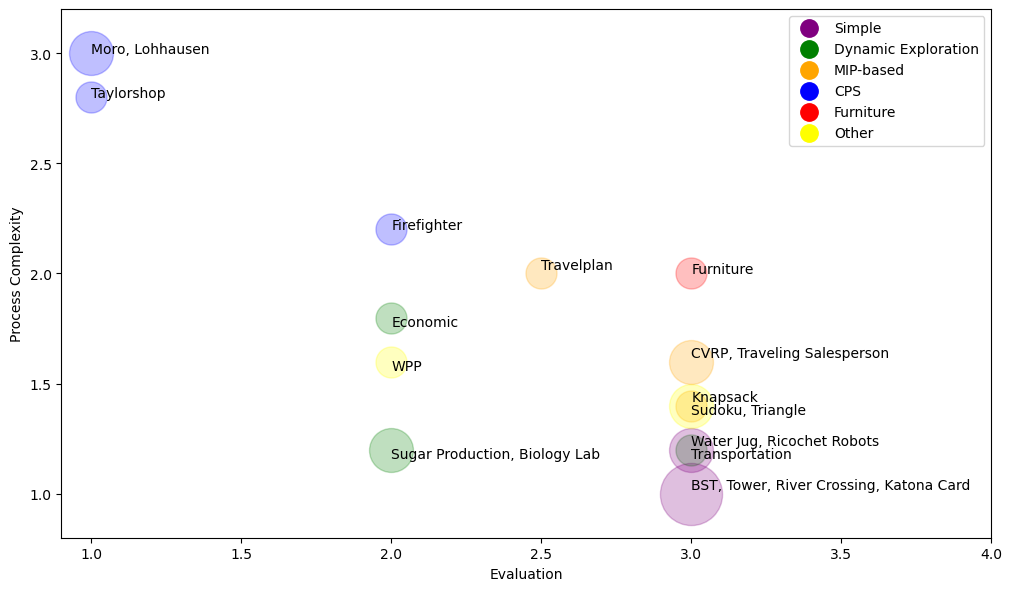

In [70]:
y_axis = 'process'
x_axis = 'evaluation'

df=tasks.groupby(by = [x_axis,y_axis,'category'],as_index=False).agg({'task':list})

figure(num=None, figsize=(12, 7), dpi=100, facecolor='w', edgecolor='k')

plt.ylabel('Process Complexity')
plt.xlabel('Evaluation')


colors = {'Simple':'purple', 'Dynamic Exploration':'green', 'MIP-based':'orange',
                 'CPS':'blue', 'Furniture':'red', 'Other':'yellow'}


for i,j in df.iterrows():
    reg_color = colors.get(j.category, 'black')
    plt.scatter(df.evaluation[i], df.process[i], s=500*len(df.task[i]), alpha = 0.25, color=reg_color)


custom = [ Line2D([], [], marker='.', color=i, linestyle='None', markersize=25) for i in colors.values()]

plt.legend(custom, colors.keys(), fontsize=10)

plt.xlim(0.9,4)
plt.ylim(0.8,3.2)
[plt.text(x=row[x_axis], y=row[y_axis], s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'CPS']
[plt.text(x=row[x_axis], y=row[y_axis]-0.04, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Other']
[plt.text(x=row[x_axis], y=row[y_axis]-0.04, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Dynamic Exploration']
[plt.text(x=row[x_axis], y=row[y_axis]+0.02, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Simple']
[plt.text(x=row[x_axis], y=row[y_axis]+0.02, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'MIP-based']
[plt.text(x=row[x_axis], y=row[y_axis], s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Furniture']
plt.show()


## Complexity vs Learnability

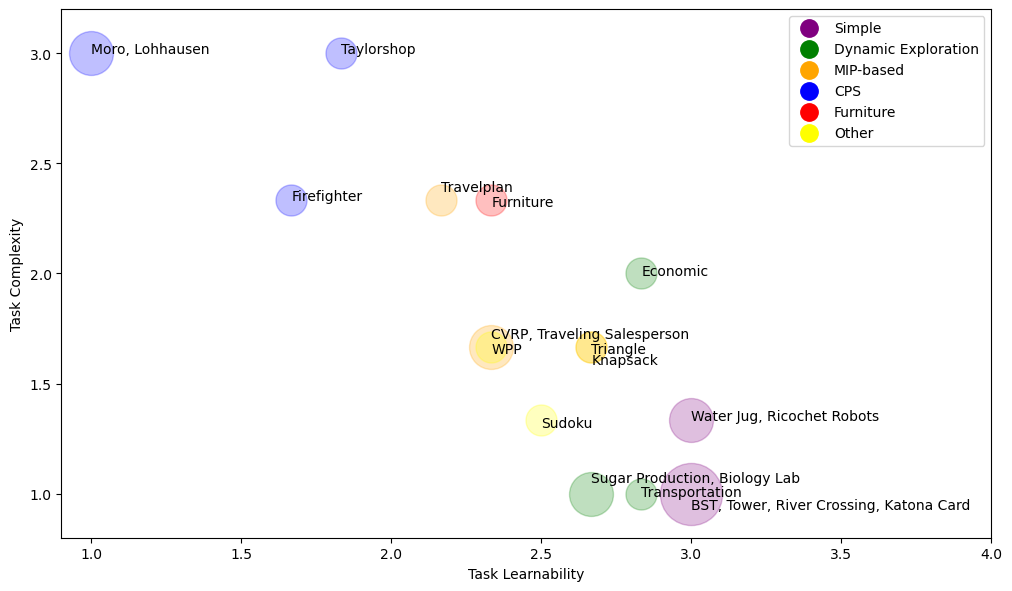

In [69]:
x_axis = 'learnability'
y_axis = 'complexity'

df=tasks.groupby(by = [x_axis,y_axis,'category'],as_index=False).agg({'task':list})

figure(num=None, figsize=(12, 7), dpi=100, facecolor='w', edgecolor='k')

plt.ylabel('Task Complexity')
plt.xlabel('Task Learnability')


colors = {'Simple':'purple', 'Dynamic Exploration':'green', 'MIP-based':'orange',
                 'CPS':'blue', 'Furniture':'red', 'Other':'yellow'}


for i,j in df.iterrows():
    reg_color = colors.get(j.category, 'black')
    plt.scatter( df.learnability[i], df.complexity[i], s=500*len(df.task[i]), alpha = 0.25, color=reg_color)

custom = [ Line2D([], [], marker='.', color=i, linestyle='None', markersize=25) for i in colors.values()]

plt.legend(custom, colors.keys(), fontsize=10)

plt.xlim(0.9,4)
plt.ylim(0.8,3.2)
[plt.text(x=row[x_axis], y=row[y_axis], s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'CPS']
[plt.text(x=row[x_axis], y=row[y_axis]-0.03, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Other']
[plt.text(x=row[x_axis], y=row[y_axis]-0.01, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Dynamic Exploration' 
 and 'Sugar Production' not in row['task']]
[plt.text(x=row[x_axis], y=row[y_axis], s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Simple' 
  and 'BST' not in row['task']]
[plt.text(x=row[x_axis], y=row[y_axis]+0.04, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'MIP-based'
  and 'Knapsack' not in row['task']]
[plt.text(x=row[x_axis], y=row[y_axis]-0.03, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Furniture']
[plt.text(x=row[x_axis], y=row[y_axis]+0.05, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if 'Sugar Production' in row['task']]
[plt.text(x=row[x_axis], y=row[y_axis]-0.07, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if 'BST' in row['task']]
[plt.text(x=row[x_axis], y=row[y_axis]-0.08, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if 'Knapsack' in row['task']]
plt.show()


## Complexity vs Evaluation

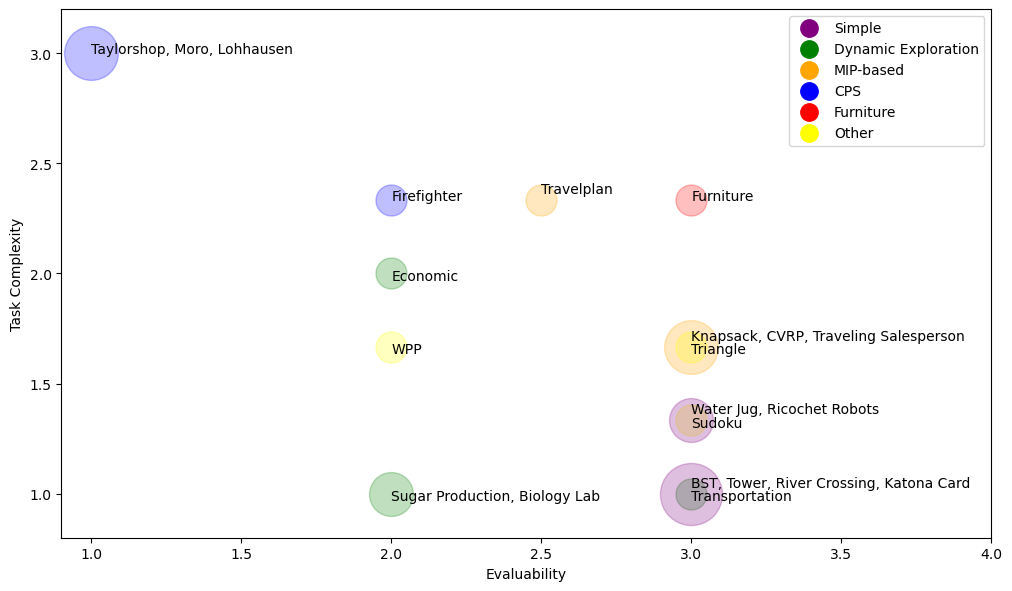

In [68]:
y_axis = 'complexity'
x_axis = 'evaluation'

df=tasks.groupby(by = [x_axis,y_axis,'category'],as_index=False).agg({'task':list})

figure(num=None, figsize=(12, 7), dpi=100, facecolor='w', edgecolor='k')

plt.ylabel('Task Complexity')
plt.xlabel('Evaluability')


colors = {'Simple':'purple', 'Dynamic Exploration':'green', 'MIP-based':'orange',
                 'CPS':'blue', 'Furniture':'red', 'Other':'yellow'}


for i,j in df.iterrows():
    reg_color = colors.get(j.category, 'black')
    plt.scatter(df.evaluation[i],df.complexity[i], s=500*len(df.task[i]), alpha = 0.25, color=reg_color)

plt.xlim(0.9,4)
plt.ylim(0.8,3.2)


custom = [ Line2D([], [], marker='.', color=i, linestyle='None', markersize=25) for i in colors.values()]

plt.legend(custom, colors.keys(), fontsize=10)

[plt.text(x=row[x_axis], y=row[y_axis], s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'CPS']
[plt.text(x=row[x_axis], y=row[y_axis]-0.03, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Other']
[plt.text(x=row[x_axis], y=row[y_axis]-0.03, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Dynamic Exploration']
[plt.text(x=row[x_axis], y=row[y_axis]+0.03, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Simple' ]
[plt.text(x=row[x_axis], y=row[y_axis]+0.03, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'MIP-based']
[plt.text(x=row[x_axis], y=row[y_axis], s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Furniture']
plt.show()


## Without furniture factory

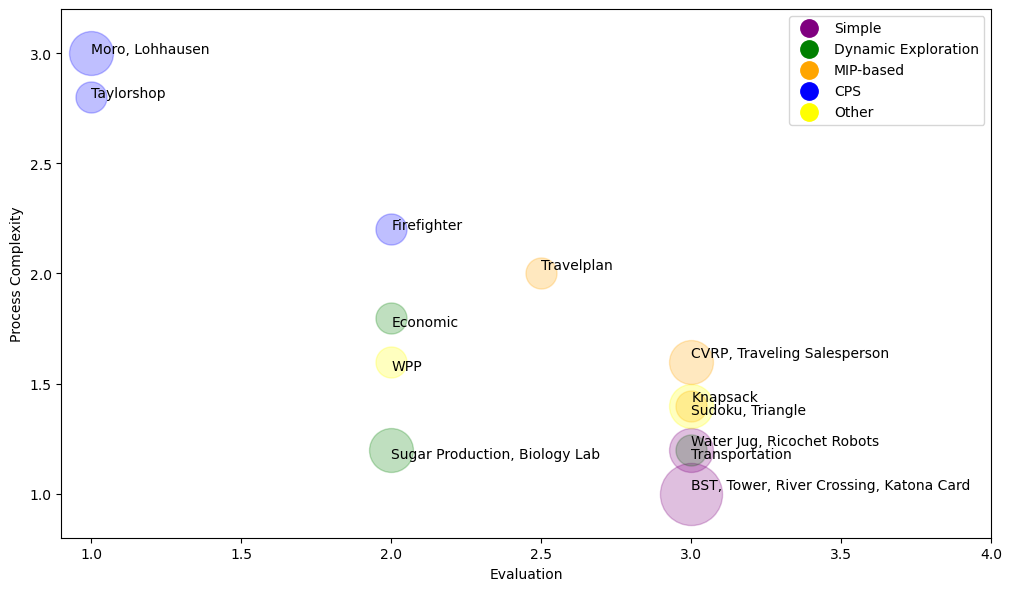

In [71]:
y_axis = 'process'
x_axis = 'evaluation'

df=tasks.groupby(by = [x_axis,y_axis,'category'],as_index=False).agg({'task':list})

figure(num=None, figsize=(12, 7), dpi=100, facecolor='w', edgecolor='k')

plt.ylabel('Process Complexity')
plt.xlabel('Evaluation')


colors = {'Simple':'purple', 'Dynamic Exploration':'green', 'MIP-based':'orange',
                 'CPS':'blue', 'Other':'yellow'}


for i,j in df.iterrows():
    if j.category == 'Furniture':
        continue
    reg_color = colors.get(j.category, 'black')
    plt.scatter(df.evaluation[i], df.process[i], s=500*len(df.task[i]), alpha = 0.25, color=reg_color)


custom = [ Line2D([], [], marker='.', color=i, linestyle='None', markersize=25) for i in colors.values()]

plt.legend(custom, colors.keys(), fontsize=10)

plt.xlim(0.9,4)
plt.ylim(0.8,3.2)
[plt.text(x=row[x_axis], y=row[y_axis], s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'CPS']
[plt.text(x=row[x_axis], y=row[y_axis]-0.04, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Other']
[plt.text(x=row[x_axis], y=row[y_axis]-0.04, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Dynamic Exploration']
[plt.text(x=row[x_axis], y=row[y_axis]+0.02, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Simple']
[plt.text(x=row[x_axis], y=row[y_axis]+0.02, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'MIP-based']
plt.show()

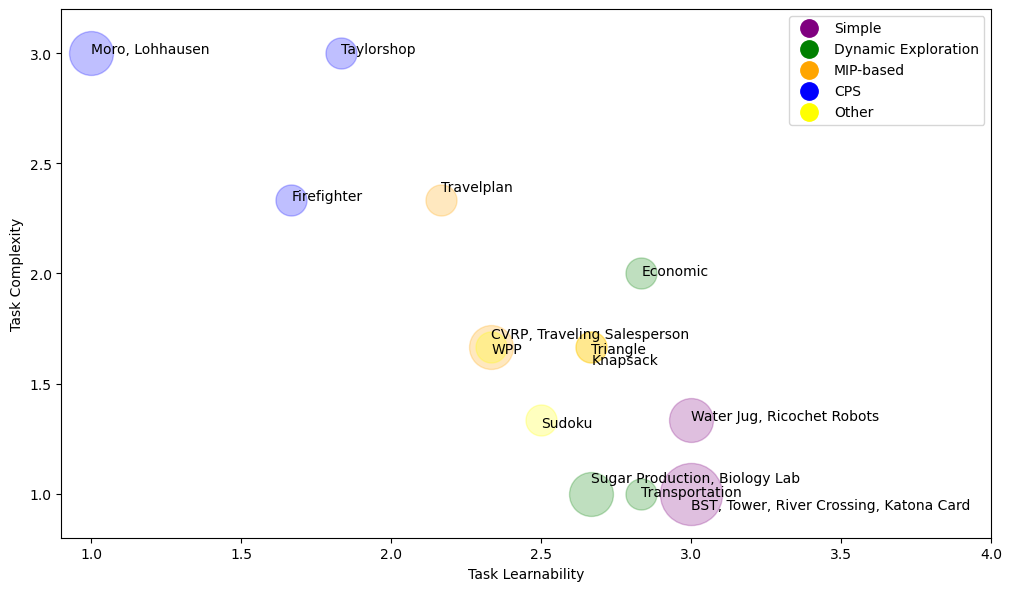

In [72]:
x_axis = 'learnability'
y_axis = 'complexity'

df=tasks.groupby(by = [x_axis,y_axis,'category'],as_index=False).agg({'task':list})

figure(num=None, figsize=(12, 7), dpi=100, facecolor='w', edgecolor='k')

plt.ylabel('Task Complexity')
plt.xlabel('Task Learnability')


colors = {'Simple':'purple', 'Dynamic Exploration':'green', 'MIP-based':'orange',
                 'CPS':'blue', 'Other':'yellow'}


for i,j in df.iterrows():
    if j.category == 'Furniture':
        continue
    reg_color = colors.get(j.category, 'black')
    plt.scatter( df.learnability[i], df.complexity[i], s=500*len(df.task[i]), alpha = 0.25, color=reg_color)

custom = [ Line2D([], [], marker='.', color=i, linestyle='None', markersize=25) for i in colors.values()]

plt.legend(custom, colors.keys(), fontsize=10)

plt.xlim(0.9,4)
plt.ylim(0.8,3.2)
[plt.text(x=row[x_axis], y=row[y_axis], s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'CPS']
[plt.text(x=row[x_axis], y=row[y_axis]-0.03, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Other']
[plt.text(x=row[x_axis], y=row[y_axis]-0.01, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Dynamic Exploration' 
 and 'Sugar Production' not in row['task']]
[plt.text(x=row[x_axis], y=row[y_axis], s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Simple' 
  and 'BST' not in row['task']]
[plt.text(x=row[x_axis], y=row[y_axis]+0.04, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'MIP-based'
  and 'Knapsack' not in row['task']]
[plt.text(x=row[x_axis], y=row[y_axis]+0.05, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if 'Sugar Production' in row['task']]
[plt.text(x=row[x_axis], y=row[y_axis]-0.07, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if 'BST' in row['task']]
[plt.text(x=row[x_axis], y=row[y_axis]-0.08, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if 'Knapsack' in row['task']]
plt.show()



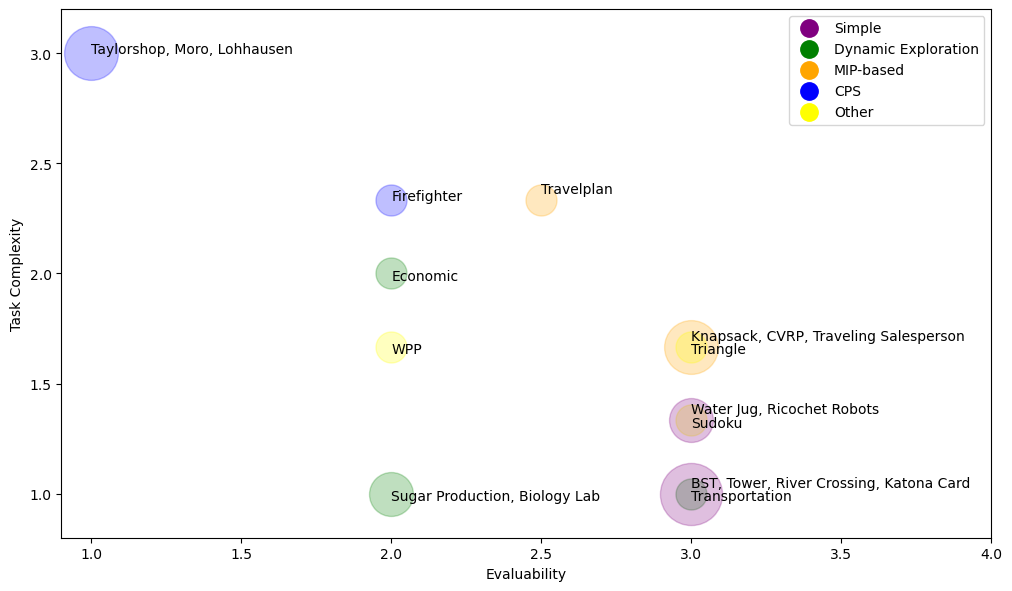

In [73]:
y_axis = 'complexity'
x_axis = 'evaluation'

df=tasks.groupby(by = [x_axis,y_axis,'category'],as_index=False).agg({'task':list})

figure(num=None, figsize=(12, 7), dpi=100, facecolor='w', edgecolor='k')

plt.ylabel('Task Complexity')
plt.xlabel('Evaluability')


colors = {'Simple':'purple', 'Dynamic Exploration':'green', 'MIP-based':'orange',
                 'CPS':'blue', 'Other':'yellow'}


for i,j in df.iterrows():
    if j.category == 'Furniture':
        continue
    reg_color = colors.get(j.category, 'black')
    plt.scatter(df.evaluation[i],df.complexity[i], s=500*len(df.task[i]), alpha = 0.25, color=reg_color)

plt.xlim(0.9,4)
plt.ylim(0.8,3.2)


custom = [ Line2D([], [], marker='.', color=i, linestyle='None', markersize=25) for i in colors.values()]

plt.legend(custom, colors.keys(), fontsize=10)

[plt.text(x=row[x_axis], y=row[y_axis], s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'CPS']
[plt.text(x=row[x_axis], y=row[y_axis]-0.03, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Other']
[plt.text(x=row[x_axis], y=row[y_axis]-0.03, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Dynamic Exploration']
[plt.text(x=row[x_axis], y=row[y_axis]+0.03, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'Simple' ]
[plt.text(x=row[x_axis], y=row[y_axis]+0.03, s=', '.join(row['task'])) 
 for k,row in df.iterrows() if row['category'] == 'MIP-based']
plt.show()
